In [1]:
import jax.numpy as jnp
import matplotlib.pyplot as plt
from jax import random

from sinterp.interpolants import (
    Interpolator,
    LinearStochastic, 
    SquaredStochastic, 
    LinearDeterministic, 
    SquaredDeterministic,
    TrigonometricStochastic,
    EncodingDecodingStochastic,
    interpolators
)

In [2]:
class Test(Interpolator):
    def __init__(self):
        super().__init__()
        self.c = 0.1

    def alpha(self, t):
        return (1-t)*(1-self.c)
    def beta(self, t):
        return t*(1-self.c)
    def gamma(self, t):
        return self.c + 0*t
    
    def __call__(self, x, y, z, t):
        return self.alpha(t) * x + self.beta(t) * y + self.gamma(t) * z

In [3]:
interpolators = [interp() for interp in interpolators]
interpolators += [Test()]

In [4]:
def draw_interp(interp):
    t = jnp.linspace(0, 1, 100)

    a = interp.alpha(t)
    b = interp.beta(t)
    c = interp.gamma(t)

    plt.plot(t, a, label='alpha')
    plt.plot(t, b, label='beta')
    plt.plot(t, c, label='gamma')


    plt.plot(t, a+b+c)
    plt.legend()

In [5]:
def draw_on_simplex(interp):
    t = jnp.linspace(0, 1, 100)

    a = interp.alpha(t)
    b = interp.beta(t)
    c = interp.gamma(t)


    z = jnp.stack([a, b, c], axis=-1)
    # draw z on a simplex / triangle

    # first plot the triangle
    triangle = jnp.array([[0, 0], [1, 0], [0.5, jnp.sqrt(3)/2], [0, 0]])
    plt.plot(triangle[:, 0], triangle[:, 1], 'k', alpha=0.0)
    plt.fill(triangle[:, 0], triangle[:, 1], 'y', alpha=0.3)

    # then project z into 2D
    z2d = jnp.dot(z, triangle[:-1])
    plt.scatter(z2d[:, 0], z2d[:, 1], c=t, cmap='viridis')

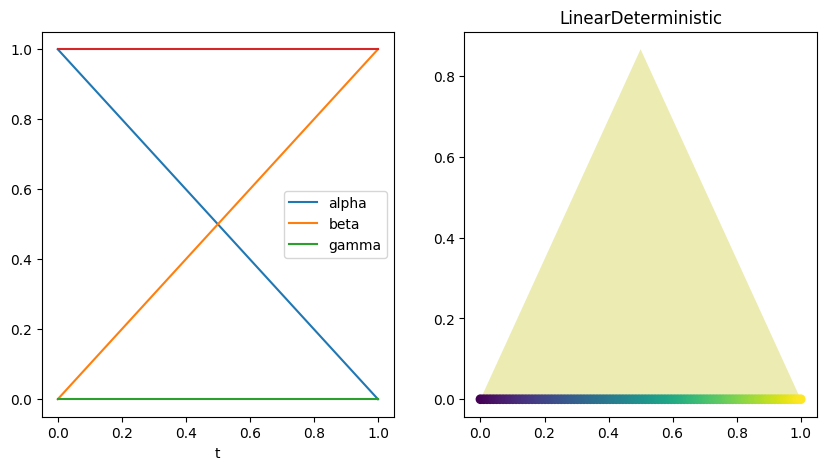

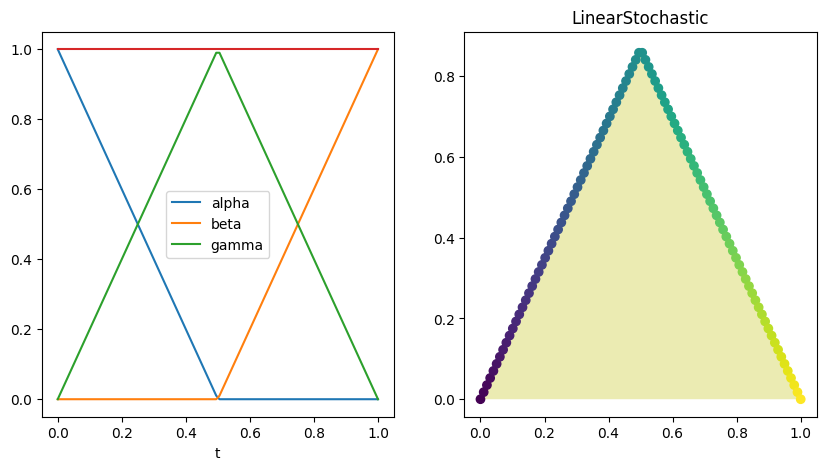

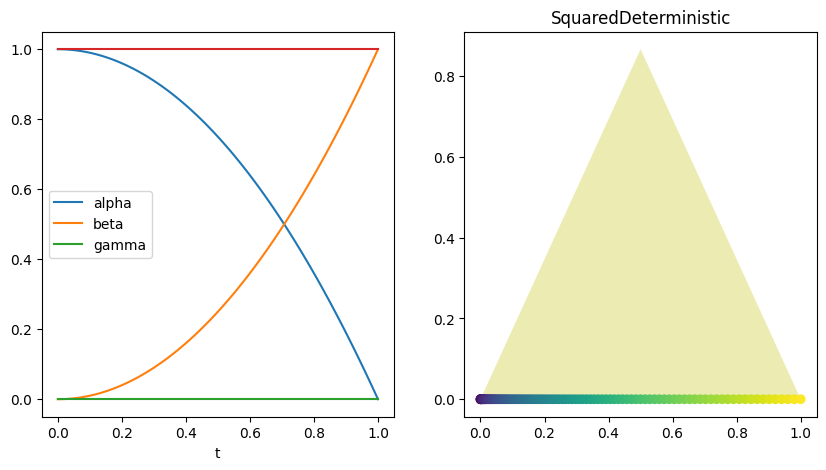

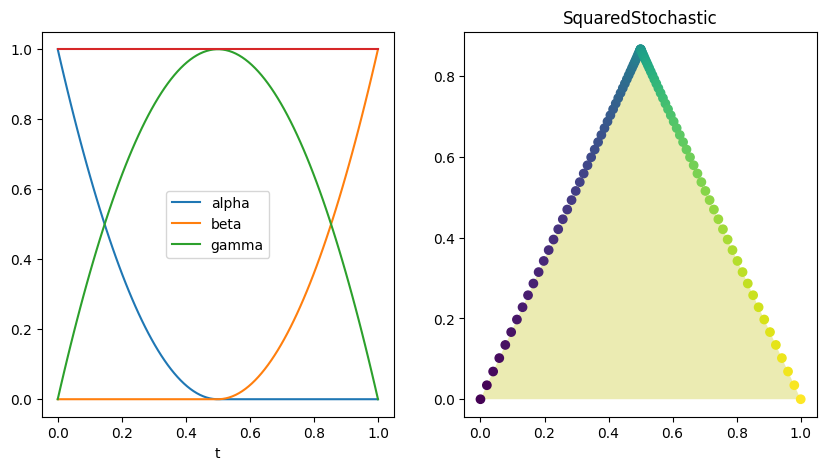

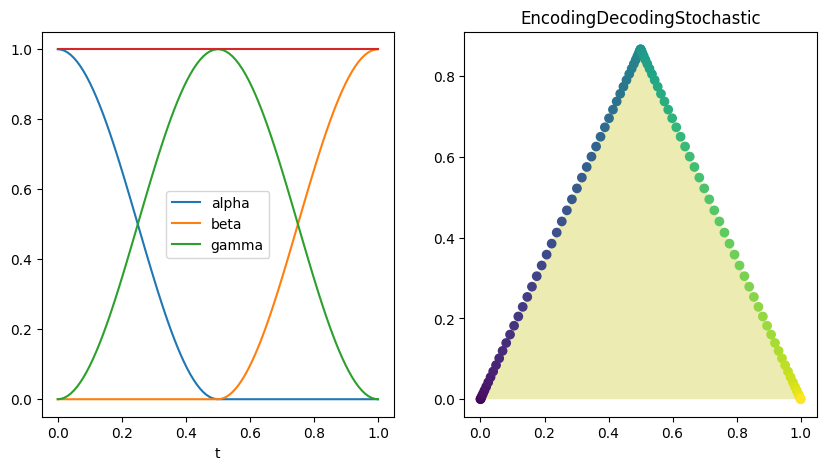

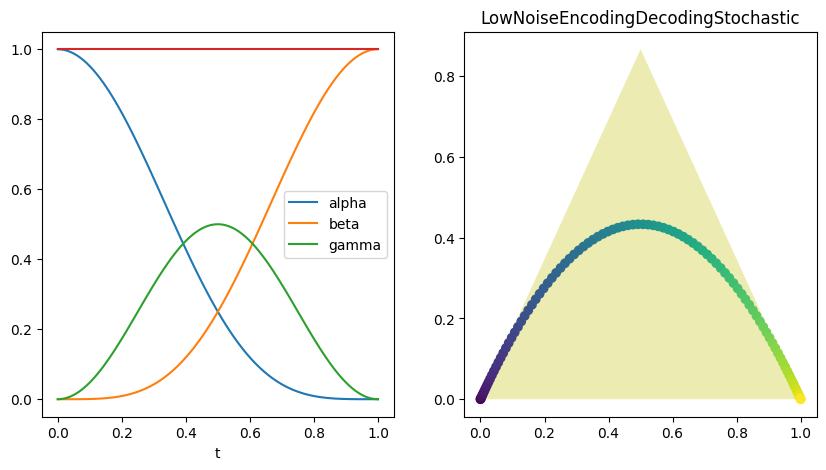

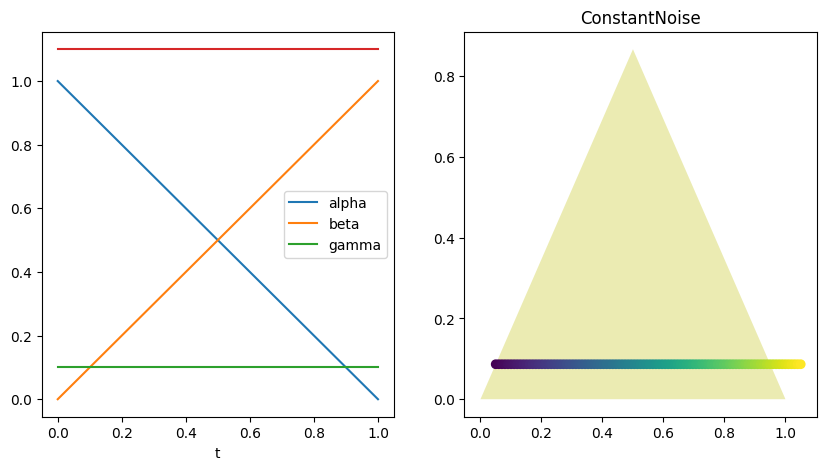

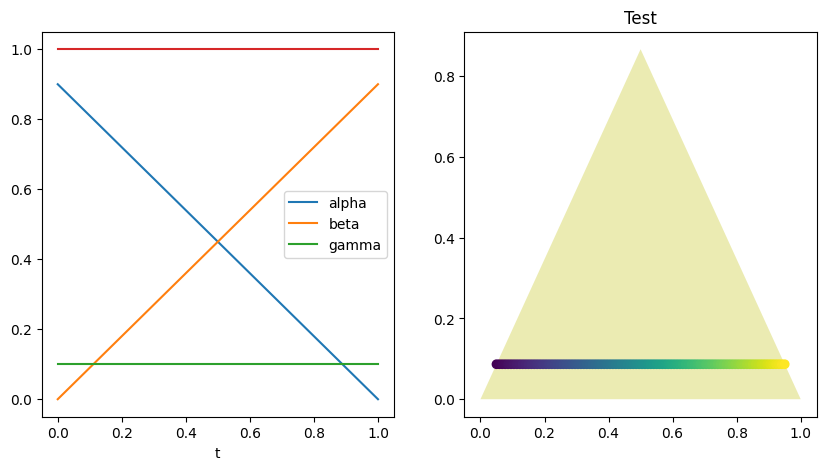

In [6]:
for interp in interpolators:
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    draw_interp(interp)
    plt.xlabel('t')
    plt.subplot(1, 2, 2)
    plt.title(type(interp).__name__)
    draw_on_simplex(interp)
    plt.savefig(f'interp_figures/{type(interp).__name__}.png')